# CAB420 Assignment 1A Question 3: Template and Utilities Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [1]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
import keras
from sklearn.metrics import ConfusionMatrixDisplay

# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, val_path, test_path):

    # load files
    train = loadmat(train_path)
    val = loadmat(val_path)
    test = loadmat(test_path)

    # pull out training set and scale X data
    train_X = train['train_X'] / 255.0
    train_Y = train['train_y'].reshape(-1)

    # pull out validation set and scale X data
    val_X = val['val_X'] / 255.0
    val_Y = val['val_y'].reshape(-1)

    # pull out test set and scale X data
    test_X = test['test_X'] / 255.0
    test_Y = test['test_y'].reshape(-1)

    # return loaded data
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

E0000 00:00:1743918723.992948  470522 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743918723.997136  470522 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

[4 1 4 ... 7 6 3]
(1000, 32, 32, 3)
(1000,)
(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


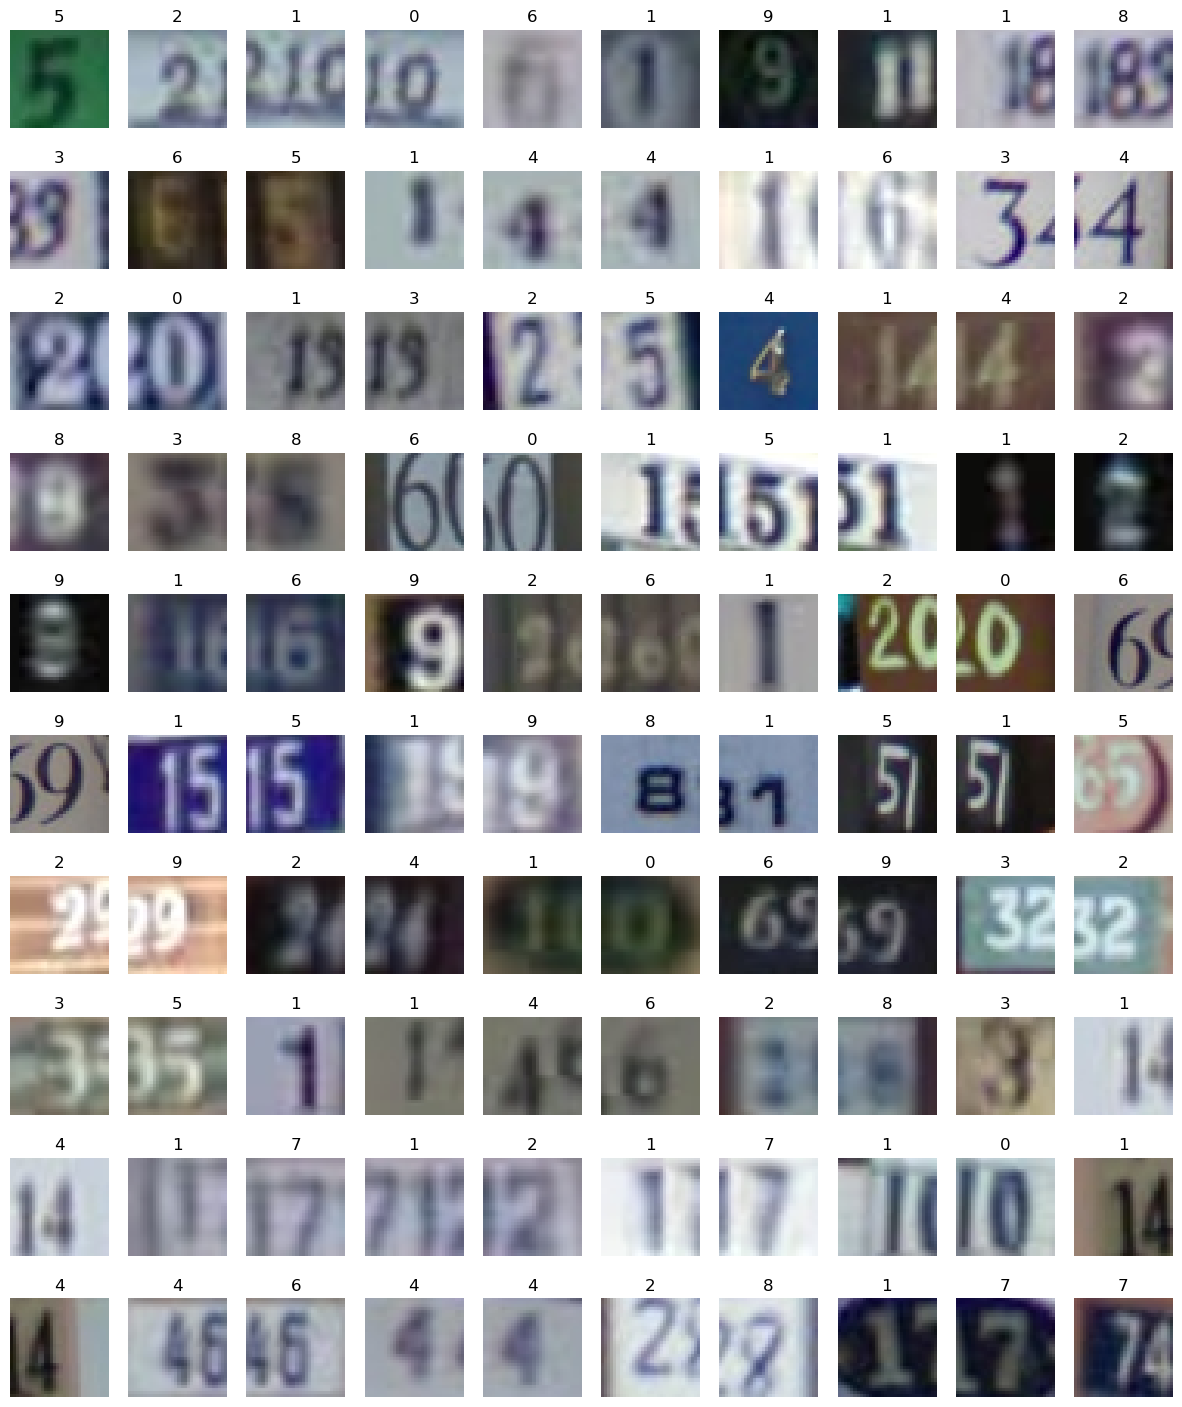

In [2]:
train_X, train_Y, val_X, val_Y, test_X, test_Y = load_data('../A1/Data/Q3/q3_train.mat', '../A1/Data/Q3/q3_validation.mat', '../A1/Data/Q3/q3_test.mat')
print(test_Y)
# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

#training_data = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
#training_data = training_data.shuffle(1000)
# modify to your chosen batch size
#training_data = training_data.batch(16)

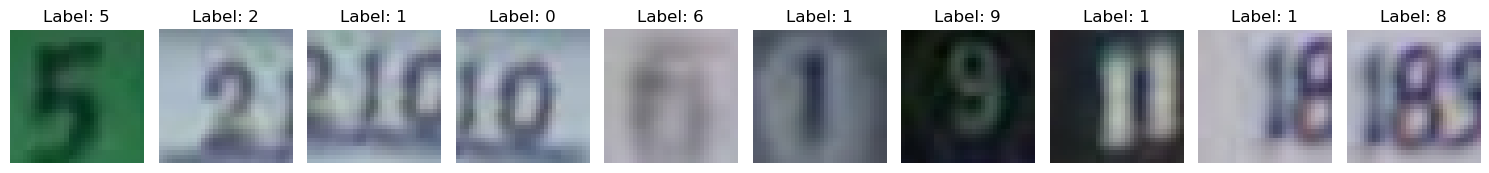

In [3]:
import matplotlib.pyplot as plt
train_X_og, train_Y_og, val_X_og, val_Y_og, test_X_og, test_Y_og = load_data('../A1/Data/Q3/q3_train.mat', '../A1/Data/Q3/q3_validation.mat', '../A1/Data/Q3/q3_test.mat')
# Set number of samples to show
num_samples = 10

# Plot
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_X_og[i])
    plt.title(f"Label: {train_Y_og[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [4]:
train_vector_X = vectorise(train_X)
val_vector_X = vectorise(val_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(val_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

I0000 00:00:1743918728.100858  470522 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1880 MB memory:  -> device: 0, name: NVIDIA A16-4Q, pci bus id: 0000:02:0a.0, compute capability: 8.6


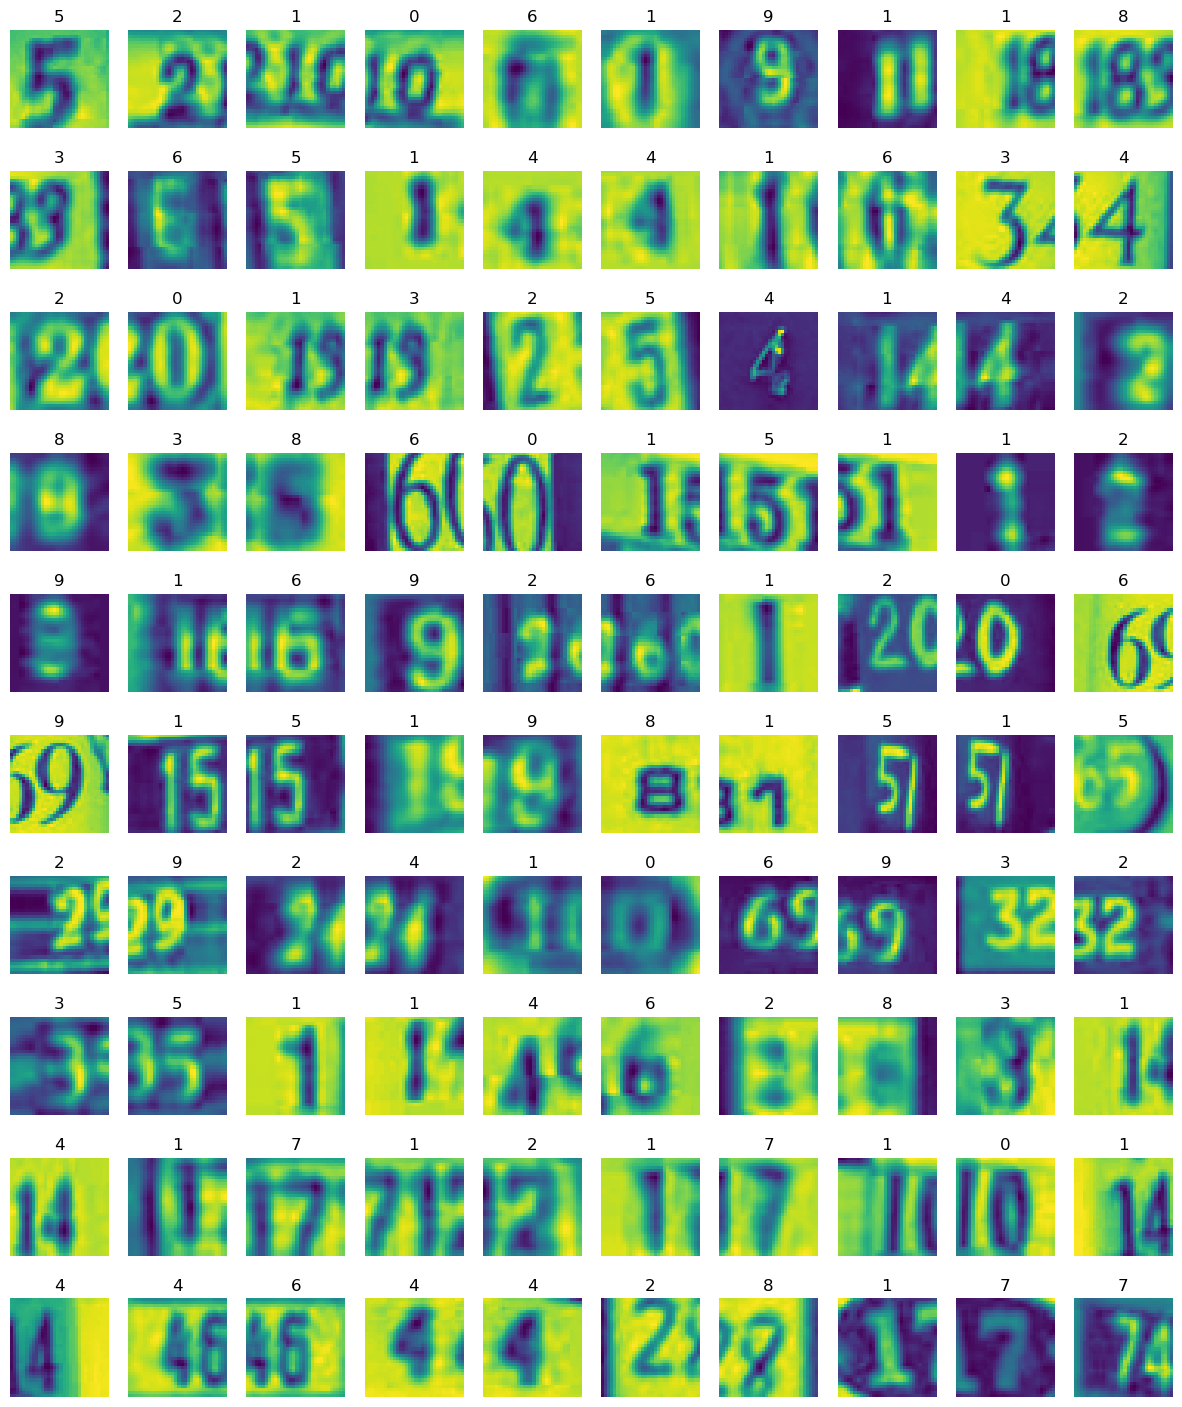

In [5]:
# Greyscaling Images
train_X = convert_to_grayscale(resize(train_X, (32,32)))
val_X = convert_to_grayscale(resize(val_X, (32,32)))
test_X = convert_to_grayscale(resize(test_X, (32,32)))

plot_images(train_X, train_Y)

# Pre-processing
Firstly, We notice that since these are numbers, colour does not play a role in determining the classes
therefore we can safetly greyscale these images, which will inturn decrease computation speed.
Based on the images of the data set, and the size of 32,32 it suggests that these images are not that clear to begin with.
I will resize these to 20x20 and using human observation come up with a conclusion whether it would be appropriate to reduce these images

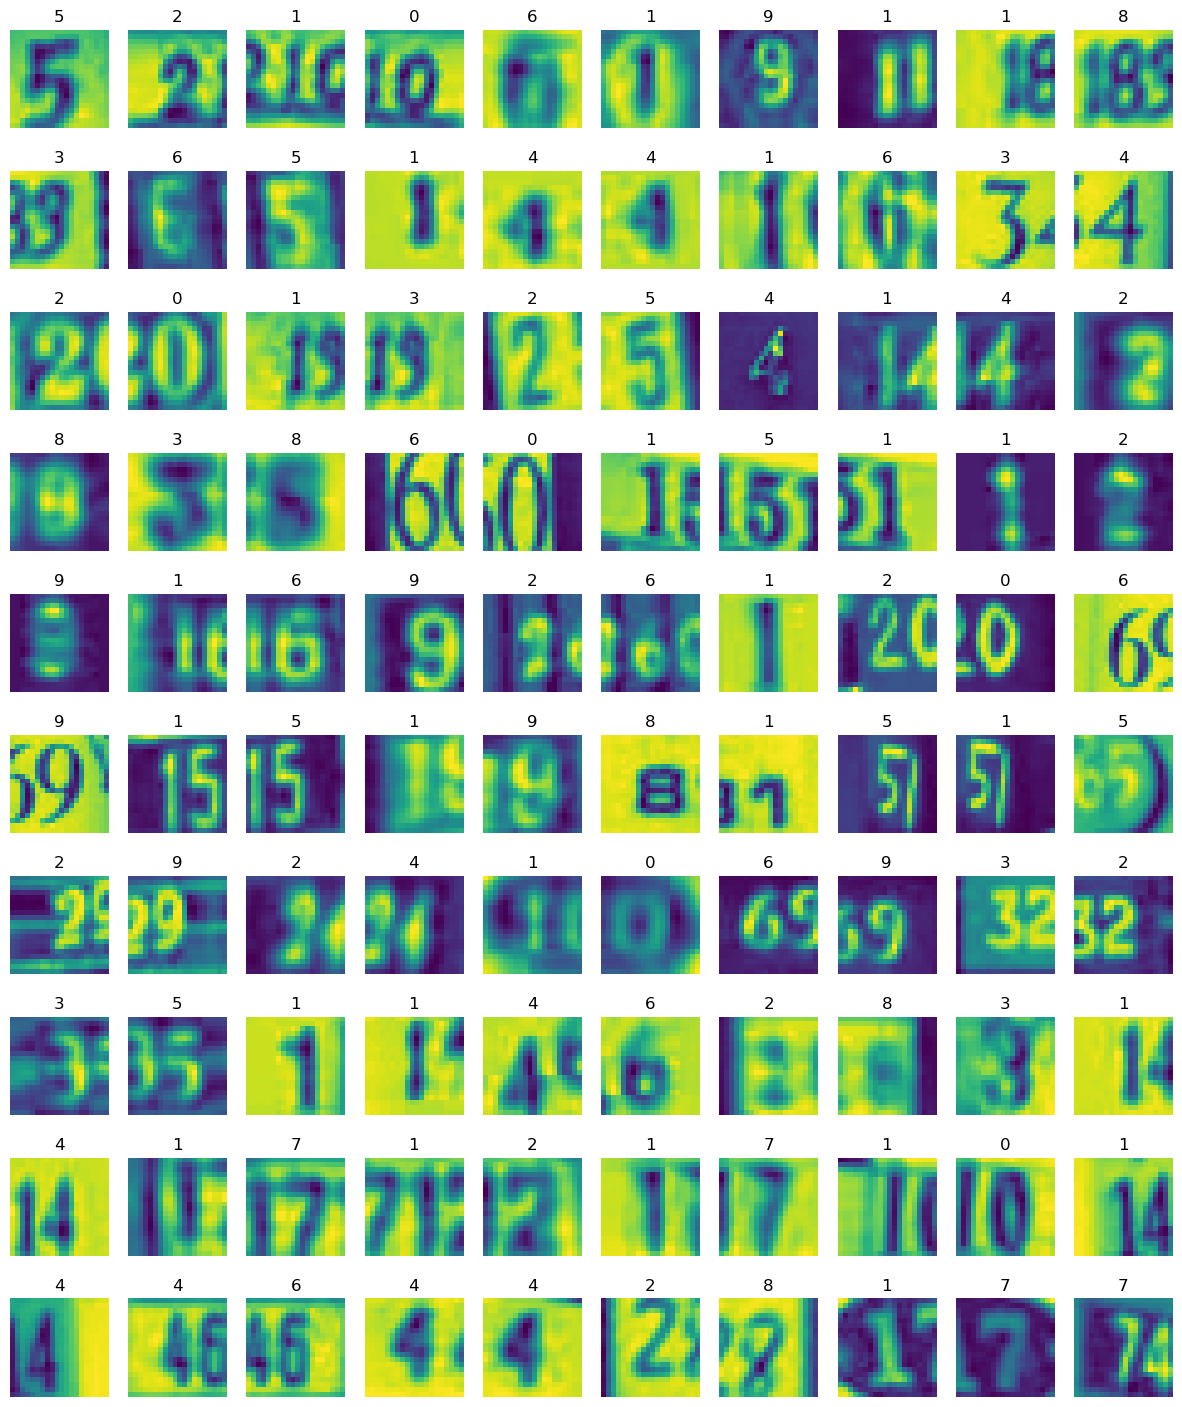

In [6]:
# Greyscaling Images
train_X_resize = resize(train_X, (20,20))
val_X_resize = resize(val_X, (20,20))
test_X_resize = resize(test_X, (20,20))

plot_images(train_X_resize, train_Y)

# We can see some images that I cannot find the correct answer, although this may me acceptable, our goal is to produce
# THe best model as we can, therefore we should not resize the images

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [7]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y,val_X, val_Y, test_X, test_Y = load_data('../A1/Data/Q3/q3_train.mat', '../A1/Data/Q3/q3_validation.mat', '../A1/Data/Q3/q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.052136 seconds
Time to resize data: 0.017095 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

Training Time: 0.541484
Inference Time (training set): 0.119161
Inference Time (testing set): 1.280058
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       686
           1       0.27      0.54      0.36      1969
           2       0.22      0.28      0.25      1629
           3       0.22      0.16      0.19      1108
           4       0.13      0.10      0.11       966
           5       0.16      0.09      0.12       902
           6       0.12      0.07      0.08       765
           7       0.14      0.05      0.07       757
           8       0.08      0.03      0.04       603
           9       0.18      0.09      0.12       615

    accuracy                           0.21     10000
   macro avg       0.16      0.15      0.15     10000
weighted avg       0.18      0.21      0.18     10000



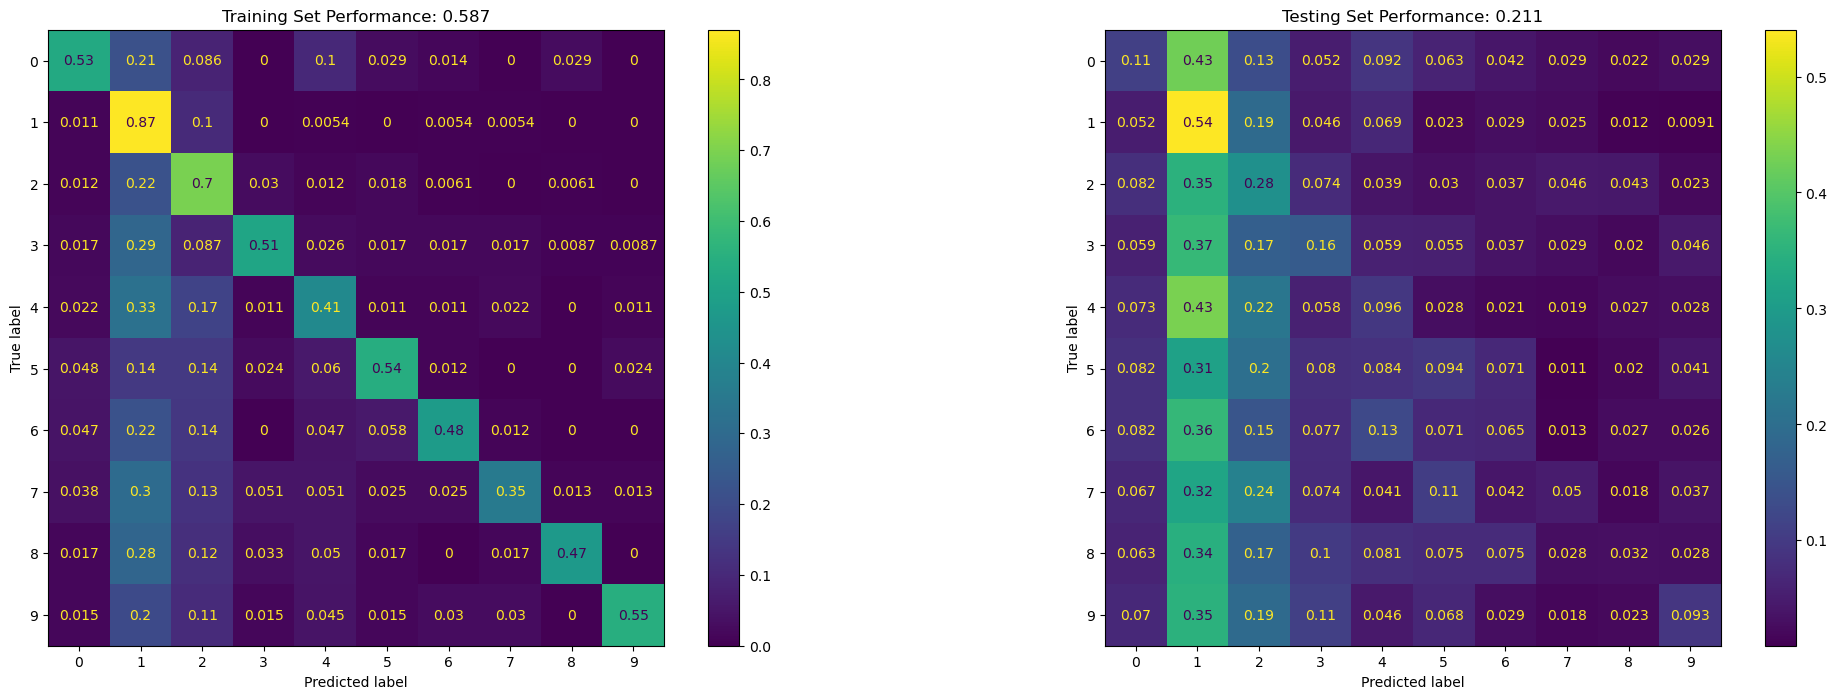

In [8]:
from sklearn.svm import SVC
from time import process_time
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.utils import to_categorical
# load data
train_X, train_Y,val_X, val_Y, test_X, test_Y = load_data('../A1/Data/Q3/q3_train.mat', '../A1/Data/Q3/q3_validation.mat', '../A1/Data/Q3/q3_test.mat')
# Greyscaling Images
train_X = convert_to_grayscale(resize(train_X, (32,32)))
val_X = convert_to_grayscale(resize(val_X, (32,32)))
test_X = convert_to_grayscale(resize(test_X, (32,32)))

# TO categorical
train_Y_cat = to_categorical(train_Y, 10)
test_Y_cat = to_categorical(test_Y, 10)

#training_data = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
#training_data = training_data.shuffle(1000, seed=0)
# modify to your chosen batch size
# See what happens when we change the batch size from 16, 32, 64
#training_data = training_data.batch(16)

# map to function

# any resize, colour change, etc, would go here
# if you do anything, do the same thing to the training, validation, and test sets

# vectorise data
# If you do any resize, reshape, etc of the data prior to putting this into your DCNN, change this code to 
# vectorise that verison of the data. The same data should be used by all models for a fair comparison; though
# you will only vectorise the data for the SVM (i.e. the DCNN will get the data as images).
train_vector_X = vectorise(train_X)
val_vector_X = vectorise(val_X)
test_vector_X = vectorise(test_X)

# train the SVM
# Note that you are not required to tune the SVM, just use it as it is. This also means that we do not need the validation
# set for the SVM as we're not selecting hyper-parameters
# measure the start time of training
svm_train_start = process_time()
# run the training - note that you don't need to change any parameters here except potentially for the input data is you 
# resize, change colour, etc
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
# record the end time of the training
svm_train_end = process_time()
# predict on the training set
train_predictions = svm.predict(train_vector_X)
# measure of the time of the training set prediction
svm_train_pred_end = process_time()
# predict on the test set
test_predictions = svm.predict(test_vector_X)
# measure the end time on the prediction of the test set
svm_test_pred_end = process_time()

# check how long the SVM took to train
svm_train_time = svm_train_end - svm_train_start
# check how long the SVM took to perform inference on the training set
svm_inference_train_time = svm_train_pred_end - svm_train_end
# check how long the SVM took to perform inference on the testing set
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
# print some times
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

# evaluate SVM
# here you can insert whatever evaluation metrics you feel are appropriate, though F1 and a confusion matrix would be a fair
# option

def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))

eval_model(svm, train_vector_X, train_Y, test_vector_X, test_Y)

In [9]:
# develop, evaluate and compare DCNNs
#
# You should create one DCNN which you will train from scratch, and then add augmentation to this and train it again.
# Use whatever augmentation you feel is appropraite.
#
# For your DCNN design, feel free to borrow networks from pracs and lecture examples. The network does not need to be
# overly complex, but you should briefly explain your selection of this model. You should avoid networks so simple 
# that they perform very badly. Look at the lecture notes and the sort of simple DCNNs we've created as a guide. With 
# respect to training time, there is no minimum or maximum training time, but you should either:
#  - Train both your models to convergence, noting that this may take different numbers of epochs
#  - Train your networks for the same period of time, ensuring that this time is sufficient for at least one to converge
# Keep in mind that with the very small training set, you may need to increase the number of epochs compared to what we
# see in the lecture examples

# DCNN Model Creation

In [10]:
from tensorflow.keras import layers, models
def VGG_Model(input_shape=(32,32,1), num_classes=10):
    """
    VGG like model 
    """

    inputs = layers.Input(shape=input_shape, name='img')

    # --- B1 ----
    x = layers.Conv2D(8, (3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(8, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(8, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(8, (3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x) # 32x32 -> 16x16

    # --- B2 ---
    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x) # 16x16 -> 8x8

    # --- B3 ---
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x) # 8x8 -> 4x4

    # --- B4 ---
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)

    # Flatten and dense layers.
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name='deep_vgg')
    return model

# build the model, and print a summary
model_vgg = VGG_Model(input_shape=(32,32,1), num_classes=10)
model_vgg.summary()

Model: "deep_vgg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,554 (2.68 MB)

 Trainable params: 701,554 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

## No Augmentation on Dataset -> Testing has way more data

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report
from time import process_time
import keras
import tensorflow as tf

# Early stopping callback
def get_early_stopping_callback():
    return keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, mode='min')

# Model checkpoint callback to save the best model
def get_model_checkpoint_callback():
    return keras.callbacks.ModelCheckpoint(
        'best_model.h5',  # File where the best model will be saved
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,  # Save the entire model (including architecture and optimizer)
        mode='min',
        verbose=1
    )

def train_and_eval_dcnn(model, train_dataset, val_X, val_Y_cat, batch_size=128):
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # Initialize early stopping, model checkpoint, and custom callback for tracking convergence
    early_stopping = get_early_stopping_callback()
    model_checkpoint = get_model_checkpoint_callback()

    # Custom callback to track time when training stops due to early stopping
    class TimeToConvergeCallback(keras.callbacks.Callback):
        def __init__(self):
            super(TimeToConvergeCallback, self).__init__()
            self.converge_time = None

        def on_epoch_end(self, epoch, logs=None):
            if self.model.stop_training:  # This means early stopping is triggered
                self.converge_time = epoch + 1
                print(f"Training stopped at epoch {self.converge_time} due to early stopping.")

    converge_callback = TimeToConvergeCallback()

    # Measure the start time for training
    train_start = process_time()
    
    # Train the model
    history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=(val_X, val_Y_cat),
        callbacks=[early_stopping, model_checkpoint, converge_callback],
        verbose=True
    )

    # Measure the end time for training
    train_end = process_time()
    train_time = train_end - train_start

    # Get the convergence time
    converge_time = converge_callback.converge_time if converge_callback.converge_time else "Not Converged"
    print(f"Time to Convergence (Early Stopping Triggered at Epoch {converge_time}): {train_time} seconds")

    # Inference time for training set
    inference_train_start = process_time()
    train_predictions = model.predict(train_dataset, verbose=False)
    inference_train_end = process_time()
    inference_train_time = inference_train_end - inference_train_start

    # Inference time for test set
    inference_test_start = process_time()
    test_predictions = model.predict(test_X, verbose=False)
    inference_test_end = process_time()
    inference_test_time = inference_test_end - inference_test_start

    # Print inference times
    print(f"Training Time: {train_time} seconds")
    print(f"Inference Time (training set): {inference_train_time} seconds")
    print(f"Inference Time (testing set): {inference_test_time} seconds")

    # Plot training history
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Non Augmented DCNN")

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Non Augmented DCNN")

    # Confusion Matrix and other metrics for model evaluation
    print("\nTotal training time:", train_time)

    return model

# Train and evaluate the model (assuming train_X, train_Y_cat, etc. are already preprocessed)
model_vgg = VGG_Model(input_shape=(32,32,1), num_classes=10)
train_and_eval_dcnn(model_vgg, train_X, train_Y_cat, test_X, test_Y_cat)


Epoch 1/100


ValueError: None values not supported.

# Increasing Batch Size

In [12]:
training_data = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
training_data = training_data.shuffle(1000)
# modify to your chosen batch size
training_data = training_data.batch(128)

## Augmenting Dataset

### With Augmentation
We will use the following:
* moderate translations
* small rotations
* moderate scale changes
* reflections on the X-axis
We  have different numbers in the picture which to be safe with we shouldnt translate

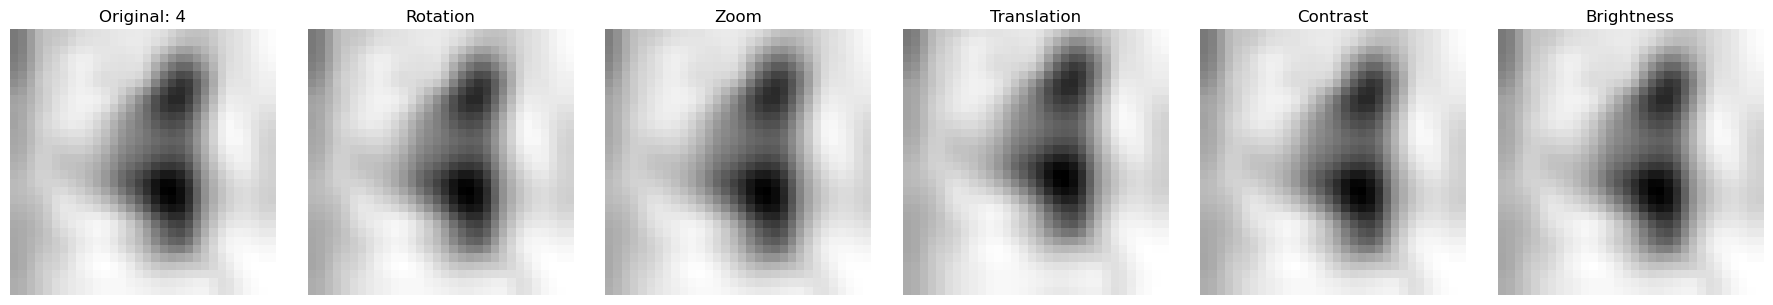

In [33]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Augmentation layers individually
rotation_layer = layers.RandomRotation(0.05)
zoom_layer = layers.RandomZoom(0.1)
translation_layer = layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=0.0)
contrast_layer = layers.RandomContrast(factor=0.2)
brightness_layer = layers.Lambda(lambda x: tf.image.random_brightness(x, max_delta=0.5))

# Load a batch from your dataset
original_images, original_labels = next(training_data.as_numpy_iterator())

# Choose a sample image
index = 0
original_image = original_images[index]
label = original_labels[index]

# Prepare figure
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

# Show original
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title(f"Original: {label}")
axes[0].axis("off")

# Apply and show each augmentation individually
augmentations = [
    ("Rotation", rotation_layer),
    ("Zoom", zoom_layer),
    ("Translation", translation_layer),
    ("Contrast", contrast_layer),
    ("Brightness", brightness_layer),
]

for i, (name, layer) in enumerate(augmentations):
    aug_image = layer(tf.expand_dims(original_image, 0), training=True)
    axes[i + 1].imshow(aug_image[0].numpy(), cmap='gray')
    axes[i + 1].set_title(name)
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()

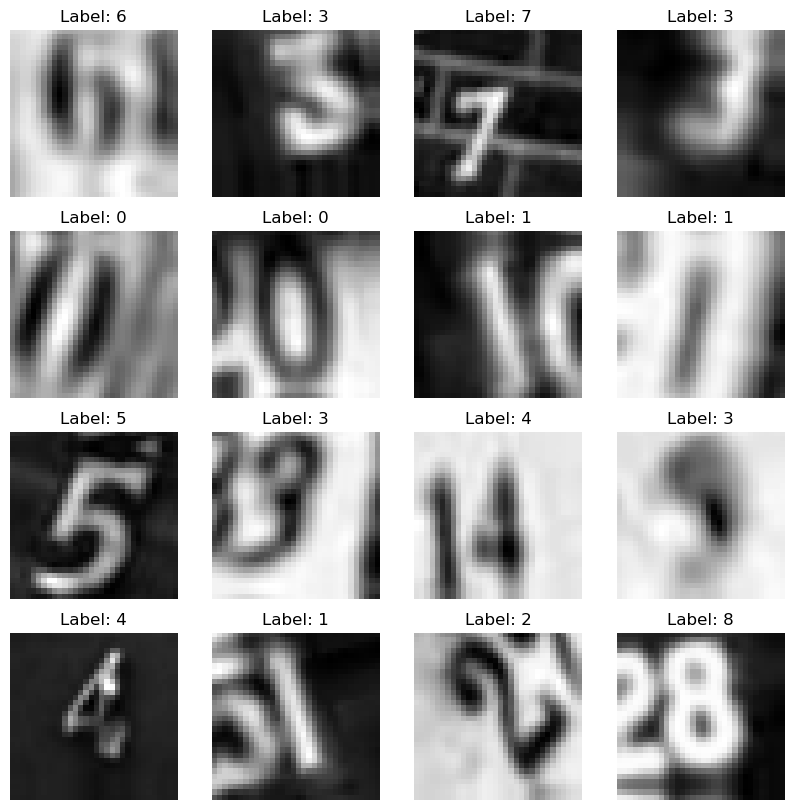

In [34]:
# Augmenting Data
data_augmentation = keras.Sequential([
  #layers.RandomFlip("horizontal"), # Instant no
  layers.RandomRotation(0.05), # Aroud 9 degrees, shouldnt change the meaning of the number
  layers.RandomZoom(0.1), # Zoom is miniscul enough such that it wont blur images from what it already is
  layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=0.0), # We do not want to shift numbers from centre
# Change the brightness and contrast
  layers.RandomContrast(factor=0.2),       # ±20% contrast variation
  layers.Lambda(lambda x: tf.image.random_brightness(x, max_delta=0.2))  # ±20% brightness
])
# Rotation with vertical translation has shown to offset numbers from the centre

training_data_augmented = training_data.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)

sample = next(training_data_augmented.as_numpy_iterator())
images, labels = sample  # split the image and label batch
fig = plt.figure(figsize=[10, 10])
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax = fig.add_subplot(4, 4, idx + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis("off")
        ax.set_title(f"Label: {labels[idx]}")

# Running Model on Augmented Data

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report
from time import process_time

def get_early_stopping_callback():
    return keras.callbacks.EarlyStopping('DCNN2.keras',monitor='val_loss', patience=50, restore_best_weights=True, mode='min')



def train_and_eval(model, train_dataset, val_X, val_Y_cat, batch_size=128):
    # Compile the model
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # Initialize early stopping callback and a custom callback to track convergence
    early_stopping = get_early_stopping_callback()

    # Custom callback to track time when training stops due to early stopping
    class TimeToConvergeCallback(keras.callbacks.Callback):
        def __init__(self):
            super(TimeToConvergeCallback, self).__init__()
            self.converge_time = None

        def on_epoch_end(self, epoch, logs=None):
            if self.model.stop_training:  # This means early stopping is triggered
                self.converge_time = self.params['epochs']
                print(f"Training stopped at epoch {self.converge_time} due to early stopping.")

    converge_callback = TimeToConvergeCallback()

    # Train the model and capture time
    timeStart = process_time()
    history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=(val_X, val_Y_cat),
        callbacks=[early_stopping, converge_callback],
        verbose=True
    )
    timeEnd = process_time()
    timeDuration = timeEnd - timeStart

    # Get the convergence time from the custom callback
    converge_time = converge_callback.converge_time if converge_callback.converge_time else "Not Converged"
    print(f"Time to Convergence (Early Stopping Triggered at Epoch {converge_time}): {timeDuration} seconds")

    # Plot training history
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Augmented DCNN")

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Augmented DCNN")

    print("\nTotal training time:", timeDuration)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.1295 - loss: 2.2933
Epoch 1: val_loss improved from inf to 2.22450, saving model to DCNN2.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.1333 - loss: 2.2911 - val_accuracy: 0.1969 - val_loss: 2.2245
Epoch 2/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1828 - loss: 2.2300
Epoch 2: val_loss did not improve from 2.22450
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.1834 - loss: 2.2327 - val_accuracy: 0.1969 - val_loss: 2.2249
Epoch 3/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1962 - loss: 2.2350
Epoch 3: val_loss improved from 2.22450 to 2.22441, saving model to DCNN2.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.1929 - loss: 2.2341 - val_accuracy: 0.1969 - val_loss: 2.2244
Epoch 4/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1762 - loss: 2.2255
Epoch 4: val_loss improved from 2.22441 to 2.22187, saving model to DCNN2.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/s

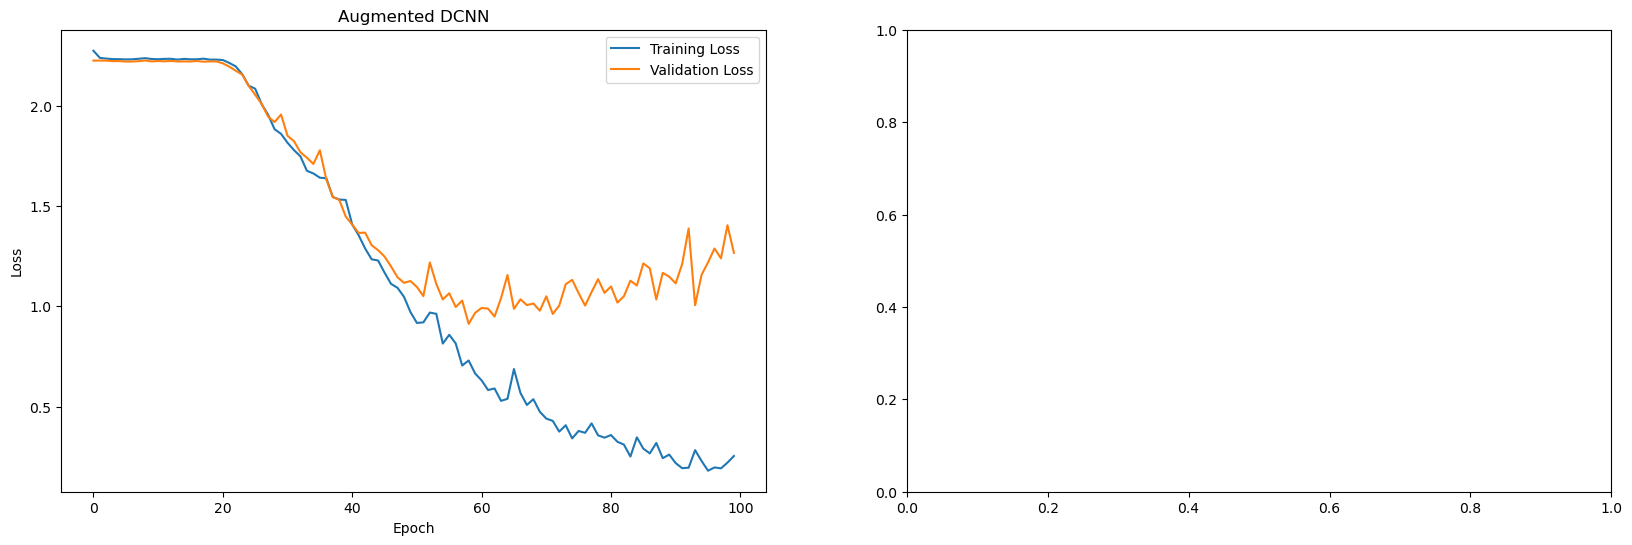

In [46]:
model_vgg = VGG_Model(input_shape=(32,32,1), num_classes=10)
train_and_eval(model_vgg, training_data_augmented, test_X, test_Y)

In [ ]:
    # plot confusion matrices and F1 scores
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    pred = model.predict(train, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    ax = fig.add_subplot(1, 2, 2)    
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

In [ ]:
# For your write-up, you should include:
# - briefly mention any pre-processing you did and why
# - outline your network design, and training approach. The discussion of training should note how long the model was trained
#   for, and if it converged. If you observe the non-augmented and augmented networks training at different rates, discuss that
#   here
# - outline your data augmentation, and briefly justify why these methods were chosen.
# - an evaluation and comparison of three models, which should highlight any differences observed between the models, and the
#   inference time of the three models
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions.
# Note that figures and tables are not included in the page limits.
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT

# DCNN Non Augmented

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Inference time on test set: 1.3130 seconds
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Inference time on training set: 0.3407 seconds


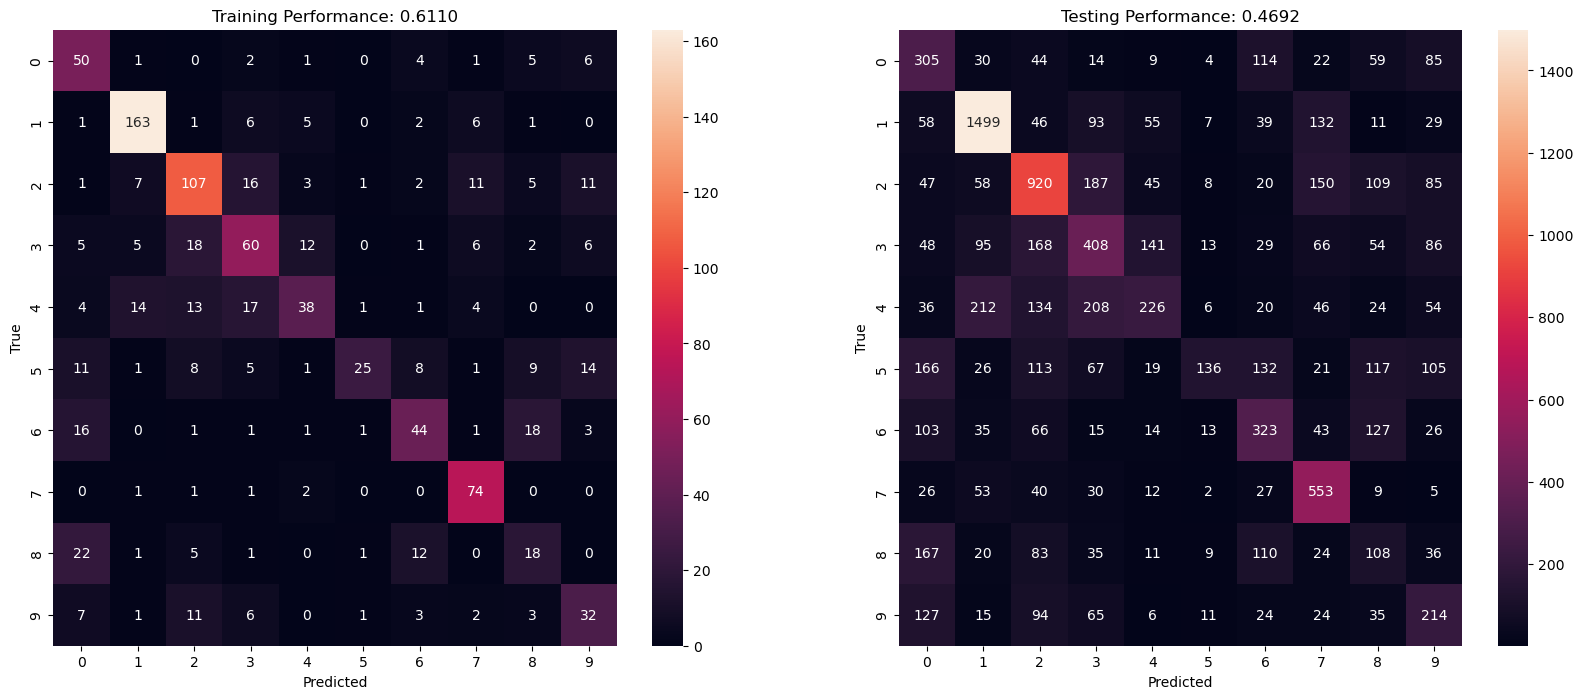

F1 Score (weighted): 0.4587
Precision (weighted): 0.4874
Recall (weighted): 0.4692
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.28      0.44      0.34       686
           1       0.73      0.76      0.75      1969
           2       0.54      0.56      0.55      1629
           3       0.36      0.37      0.37      1108
           4       0.42      0.23      0.30       966
           5       0.65      0.15      0.24       902
           6       0.39      0.42      0.40       765
           7       0.51      0.73      0.60       757
           8       0.17      0.18      0.17       603
           9       0.30      0.35      0.32       615

    accuracy                           0.47     10000
   macro avg       0.43      0.42      0.41     10000
weighted avg       0.49      0.47      0.46     10000



In [61]:
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the trained model from the .keras file
model = load_model('DCNN1.keras')

# Measure inference time for the test set
inference_start_test = time.process_time()

# Assuming test_X is your test data and test_Y_cat are the true labels
test_predictions = model.predict(test_X)

inference_end_test = time.process_time()
inference_time_test = inference_end_test - inference_start_test

print(f"Inference time on test set: {inference_time_test:.4f} seconds")

# Get predicted classes (for classification evaluation)
predicted_classes_test = np.argmax(test_predictions, axis=1)
true_classes_test = np.argmax(test_Y_cat, axis=1)  # Assuming test_Y_cat is one-hot encoded

# Calculate accuracy for the test set
accuracy_test = np.mean(predicted_classes_test == true_classes_test)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(true_classes_test, predicted_classes_test)

# Measure inference time for the training set
inference_start_train = time.process_time()

# Predict on the training set
train_predictions = model.predict(train_X)
predicted_classes_train = np.argmax(train_predictions, axis=1)
true_classes_train = np.argmax(train_Y_cat, axis=1)

inference_end_train = time.process_time()
inference_time_train = inference_end_train - inference_start_train

print(f"Inference time on training set: {inference_time_train:.4f} seconds")

# Calculate accuracy for the training set
accuracy_train = np.mean(predicted_classes_train == true_classes_train)

# Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(true_classes_train, predicted_classes_train)

# Plot both confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 8])

# Plot confusion matrix for the training set
sns.heatmap(conf_matrix_train, annot=True, fmt='g', xticklabels=range(10), yticklabels=range(10), ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
ax1.set_title(f'Training Performance: {accuracy_train:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(conf_matrix_test, annot=True, fmt='g', xticklabels=range(10), yticklabels=range(10), ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')
ax2.set_title(f'Testing Performance: {accuracy_test:.4f}')

plt.show()

# Calculate and print evaluation metrics for the test set
f1 = f1_score(true_classes_test, predicted_classes_test, average='weighted')
precision = precision_score(true_classes_test, predicted_classes_test, average='weighted')
recall = recall_score(true_classes_test, predicted_classes_test, average='weighted')

print(f"F1 Score (weighted): {f1:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Classification Report for Test Set
class_report = classification_report(true_classes_test, predicted_classes_test, target_names=[str(i) for i in range(10)])
print("Classification Report (Test Set):\n", class_report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Inference time on test set: 1.3040 seconds
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Inference time on training set: 0.3383 seconds


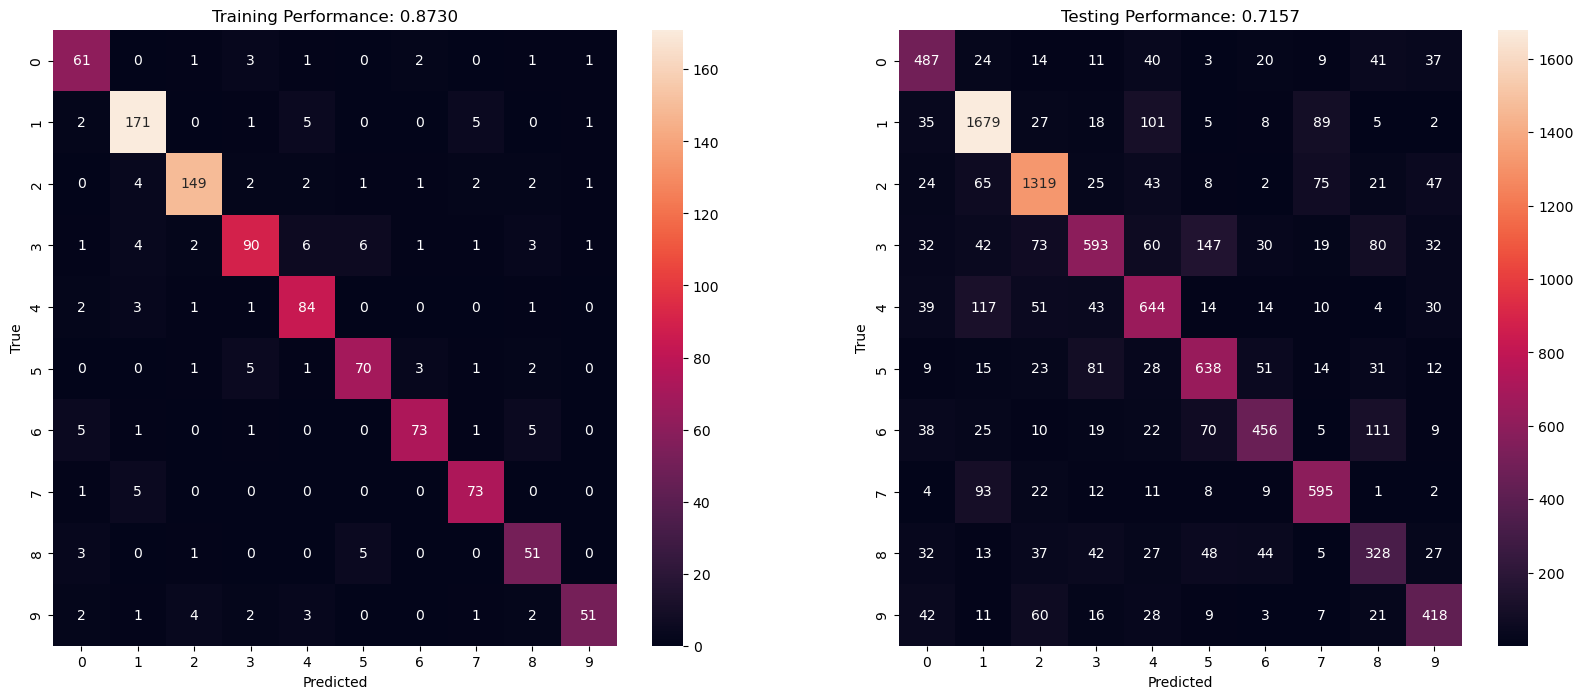

F1 Score (weighted): 0.7137
Precision (weighted): 0.7156
Recall (weighted): 0.7157
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       686
           1       0.81      0.85      0.83      1969
           2       0.81      0.81      0.81      1629
           3       0.69      0.54      0.60      1108
           4       0.64      0.67      0.65       966
           5       0.67      0.71      0.69       902
           6       0.72      0.60      0.65       765
           7       0.72      0.79      0.75       757
           8       0.51      0.54      0.53       603
           9       0.68      0.68      0.68       615

    accuracy                           0.72     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.72      0.72      0.71     10000



In [62]:
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the trained model from the .keras file
model = load_model('DCNN2.keras')

# Measure inference time for the test set
inference_start_test = time.process_time()

# Assuming test_X is your test data and test_Y_cat are the true labels
test_predictions = model.predict(test_X)

inference_end_test = time.process_time()
inference_time_test = inference_end_test - inference_start_test

print(f"Inference time on test set: {inference_time_test:.4f} seconds")

# Get predicted classes (for classification evaluation)
predicted_classes_test = np.argmax(test_predictions, axis=1)
true_classes_test = np.argmax(test_Y_cat, axis=1)  # Assuming test_Y_cat is one-hot encoded

# Calculate accuracy for the test set
accuracy_test = np.mean(predicted_classes_test == true_classes_test)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(true_classes_test, predicted_classes_test)

# Measure inference time for the training set
inference_start_train = time.process_time()

# Predict on the training set
train_predictions = model.predict(train_X)
predicted_classes_train = np.argmax(train_predictions, axis=1)
true_classes_train = np.argmax(train_Y_cat, axis=1)

inference_end_train = time.process_time()
inference_time_train = inference_end_train - inference_start_train

print(f"Inference time on training set: {inference_time_train:.4f} seconds")

# Calculate accuracy for the training set
accuracy_train = np.mean(predicted_classes_train == true_classes_train)

# Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(true_classes_train, predicted_classes_train)

# Plot both confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 8])

# Plot confusion matrix for the training set
sns.heatmap(conf_matrix_train, annot=True, fmt='g', xticklabels=range(10), yticklabels=range(10), ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
ax1.set_title(f'Training Performance: {accuracy_train:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(conf_matrix_test, annot=True, fmt='g', xticklabels=range(10), yticklabels=range(10), ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')
ax2.set_title(f'Testing Performance: {accuracy_test:.4f}')

plt.show()

# Calculate and print evaluation metrics for the test set
f1 = f1_score(true_classes_test, predicted_classes_test, average='weighted')
precision = precision_score(true_classes_test, predicted_classes_test, average='weighted')
recall = recall_score(true_classes_test, predicted_classes_test, average='weighted')

print(f"F1 Score (weighted): {f1:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Classification Report for Test Set
class_report = classification_report(true_classes_test, predicted_classes_test, target_names=[str(i) for i in range(10)])
print("Classification Report (Test Set):\n", class_report)
